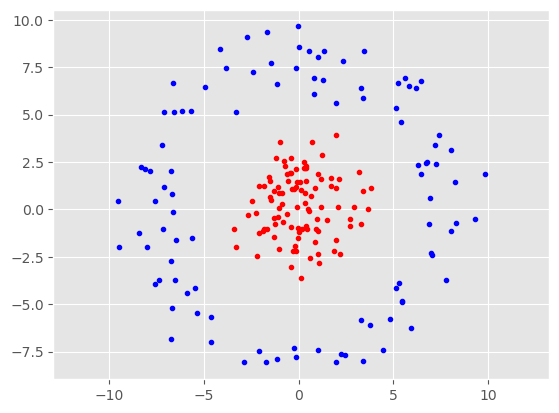

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
plt.style.use('ggplot')
import numpy as np
n=100

#polar coordinate
r1=8+np.random.randn(n)
theta1=np.random.rand(n)*2.0*np.pi

r2=2+np.random.randn(n)
theta2=np.random.rand(n)*2.0*np.pi

x1=np.concatenate( (r1*np.cos(theta1), r2*np.cos(theta2)))
x2=np.concatenate( (r1*np.sin(theta1), r2*np.sin(theta2)))
yt=np.ones( (2*n,1))
yt[n:]=-1
plt.axis('equal')
plt.plot(x1[(yt==1)[:,0]],x2[(yt==1)[:,0]],'.b')
plt.plot(x1[(yt==-1)[:,0]],x2[(yt==-1)[:,0]],'.r')

In [26]:
x=np.concatenate( (x1.reshape((-1,1)), x2.reshape((-1,1))), axis=1 )
x.shape

(200, 2)

In [27]:
"""
def forward(a,w,b):
    z = np.einsum('ij,jk->ik', a, w) + b
    return np.tanh(z)

def g(a):
    return 1 - a*a
"""

"\ndef forward(a,w,b):\n    z = np.einsum('ij,jk->ik', a, w) + b\n    return np.tanh(z)\n\ndef g(a):\n    return 1 - a*a\n"

In [28]:
def forward(a,w,b):
    z=np.dot(a,w)+b
    return np.tanh(z)

def g(a):
    return 1-a*a

In [29]:
k0=2
k1=3
k2=1
w1=np.random.randn(k0,k1)
b1=np.random.randn(1,k1)
w2=np.random.randn(k1,k2)
b2=np.random.randn(1,k2)
m=1000
alpha=0.001
for i in range(m):
    #forward
    a1=x
    a2=forward(a1,w1,b1)
    a3=forward(a2,w2,b2)
    yp=a3
    L=0.5*np.average((yp-yt)*(yp-yt))
    #back propagation
    da3 = (yp - yt) * g(a3)
    dz2= np.einsum('ij,jk->ik', da3, w2.T)
    da2= dz2*g(a2)
    w1=w1-alpha*np.einsum('ij,jk->ik', a1.T, da2)
    b1=b1-alpha*np.einsum('ij->j', da2)
    w2=w2-alpha*np.einsum('ij,jk->ik', a2.T, da3)
    b2=b2-alpha*np.einsum('ij->j', da3)
    if i%(m//10)==0:
        print("Loss: %s"%L)
        #print(" w1:%s, b1:%s, w2:%s, b2:%s "%(w1,b1,w2,b2) )

Loss: 0.662077554401463
Loss: 0.19223766602894757
Loss: 0.1731061733920383
Loss: 0.1661484802894809
Loss: 0.11613263282775717
Loss: 0.028628837494981036
Loss: 0.017586246110912463
Loss: 0.01314216549848863
Loss: 0.010660648817152151
Loss: 0.00905860541229521


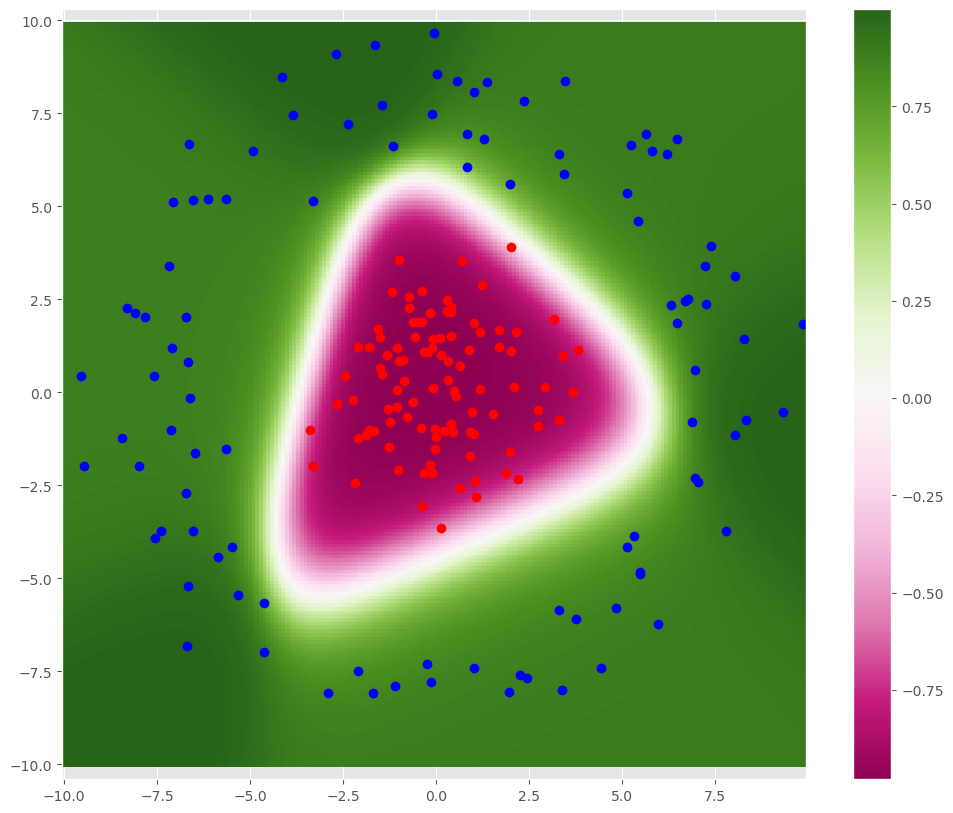

In [30]:
my,mx=np.mgrid[slice(-10,10,0.1),slice(-10,10,0.1)]
out=np.zeros(mx.shape)
for i in range(mx.shape[0]):
    for j in range(mx.shape[1]):
        u=[ mx[i,j], my[i,j]]
        #forward
        a1=u
        a2=forward(a1,w1,b1)
        a3=forward(a2,w2,b2)
        yp=a3
        out[i,j]=yp
plt.figure(figsize=(12,10))
plt.pcolor(mx,my,out,cmap=cm.PiYG)
plt.colorbar()
plt.axis('equal')
plt.plot(x1[(yt==1)[:,0]],x2[(yt==1)[:,0]],'ob')
plt.plot(x1[(yt==-1)[:,0]],x2[(yt==-1)[:,0]],'or')


In [31]:
a3.shape

(1, 1)

In [32]:
yt.shape

(200, 1)